# Sina plot

See:

- [Issue #1298](https://github.com/JetBrains/lets-plot/issues/1298) - Feature request `geom_sina()`.
- [Sina plot](https://ggforce.data-imaginist.com/reference/geom_sina.html) (docs).
- [SinaPlot: an enhanced chart for simple and truthful representation of single observations over multiple classes](https://sci-hub.se/https://doi.org/10.1080/10618600.2017.1366914) (original article).
- [ggforce / sina.R](https://github.com/thomasp85/ggforce/blob/main/R/sina.R) (source code).

In [1]:
install.packages("cowplot")

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [2]:
library(ggplot2)
library(ggforce)
library(cowplot)

In [3]:
g <- ggplot(iris, aes(Species, Sepal.Length))

## `geom_sina()`

### Default example

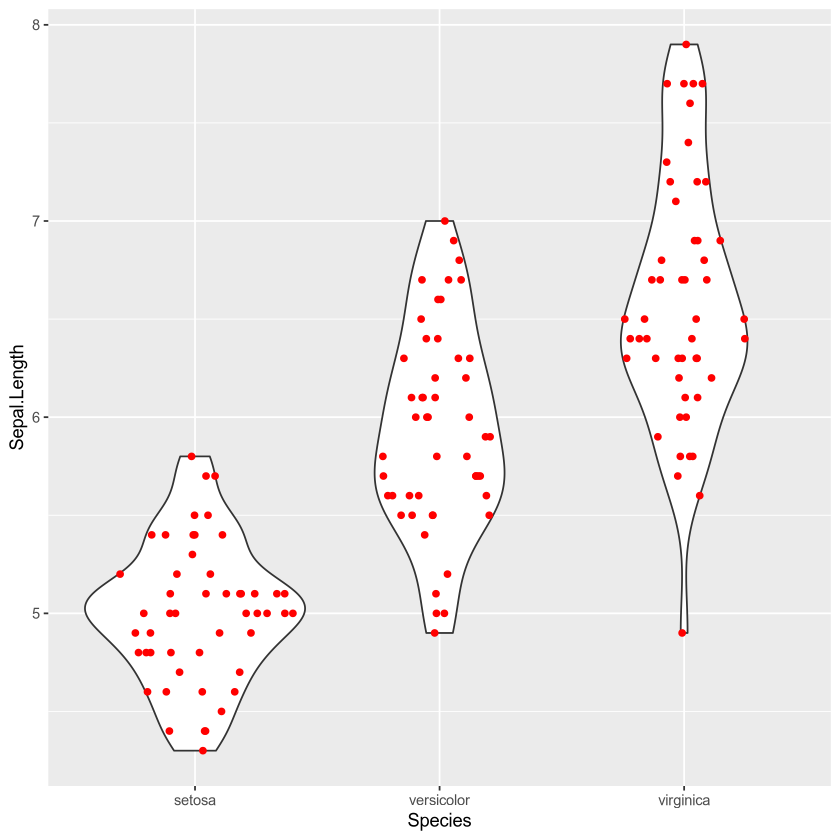

In [4]:
p <- g + geom_violin() + geom_sina(color = 'red', seed = 0)
p

In [5]:
pg <- ggplot_build(p)

In [6]:
# Violin data:
violin_df <- pg$data[[1]] # layer_data(p, 1)
head(violin_df, 5)

,x,density,scaled,ndensity,count,n,y,PANEL,group,violinwidth,⋯,width,xmin,xmax,ymax,weight,colour,fill,linewidth,alpha,linetype
,<mppd_dsc>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<fct>,<int>,<dbl>,⋯,<dbl>,<mppd_dsc>,<mppd_dsc>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<lgl>,<chr>
1,1,0.2360044,0.1904516,0.1904516,11.80022,50,4.300000,1,1,0.1904516,⋯,0.9,0.55,1.45,4.300000,1,grey20,white,0.5,NA,solid
2,1,0.2402187,0.1938525,0.1938525,12.01094,50,4.302935,1,1,0.1938525,⋯,0.9,0.55,1.45,4.302935,1,grey20,white,0.5,NA,solid
3,1,0.2444243,0.1972463,0.1972463,12.22121,50,4.305871,1,1,0.1972463,⋯,0.9,0.55,1.45,4.305871,1,grey20,white,0.5,NA,solid
4,1,0.2486235,0.2006350,0.2006350,12.43117,50,4.308806,1,1,0.2006350,⋯,0.9,0.55,1.45,4.308806,1,grey20,white,0.5,NA,solid
5,1,0.2528033,0.2040081,0.2040081,12.64017,50,4.311742,1,1,0.2040081,⋯,0.9,0.55,1.45,4.311742,1,grey20,white,0.5,NA,solid


In [7]:
# Sina data:
sina_df <- pg$data[[2]] # layer_data(p, 2)
head(sina_df, 5)

,x,y,PANEL,group,flipped_aes,density,scaled,width,n,sinawidth,xmin,xmax,x_diff,ymax,shape,colour,size,fill,alpha,stroke
,<mppd_dsc>,<dbl>,<fct>,<int>,<lgl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<mppd_dsc>,<mppd_dsc>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<lgl>,<lgl>,<dbl>
1,1.3346928,5.1,1,1,FALSE,1.1529846,0.9304393,0.9,50,0.9374427,0.55,1.45,0.33469280,5.1,19,red,1.5,NA,NA,0.5
2,0.8177006,4.9,1,1,FALSE,1.0624163,0.8573522,0.9,50,0.8638055,0.55,1.45,-0.18229941,4.9,19,red,1.5,NA,NA,0.5
3,0.9368269,4.7,1,1,FALSE,0.6751168,0.5448080,0.9,50,0.5489087,0.55,1.45,-0.06317308,4.7,19,red,1.5,NA,NA,0.5
4,1.0296925,4.6,1,1,FALSE,0.5569718,0.4494669,0.9,50,0.4528501,0.55,1.45,0.02969248,4.6,19,red,1.5,NA,NA,0.5
5,1.3673870,5.0,1,1,FALSE,1.2299254,0.9925292,0.9,50,1.0000000,0.55,1.45,0.36738701,5.0,19,red,1.5,NA,NA,0.5


### Minimalistic example

In [8]:
g <- ggplot(data.frame(
    x = c(2.5, 2.5, 2.5),
    y = c(1, 1, 2)
), aes(x, y))

In [9]:
get_plot <- function (df, position = NULL, jitter_y = TRUE, seed = 0) {
    p <- ggplot(df, aes(x = x, y = y)) +
        geom_violin() +
        ggtitle(seed)
    if (is.null(position)) {
        p + geom_sina(color = 'red', size = 3, jitter_y = jitter_y, seed = seed)
    } else {
        p + geom_sina(position = position, color = 'red', size = 3, jitter_y = jitter_y, seed = seed)
    }
}

In [10]:
get_min_plot <- function (cat = 'a', jitter_y = TRUE, seed = 0) {
    p <- get_plot(data.frame(
        x = c(cat, cat, cat),
        y = c(1, 1, 2)
    ), jitter_y = jitter_y, seed = seed)
    if (is.numeric(cat)) {
        p = p + scale_x_continuous(breaks = c(cat - .5, cat - .4, cat - .3, cat - .2, cat - .1,
                                              cat,
                                              cat + .1, cat + .2, cat + .3, cat + .4, cat + .5))
    }
    p
}

In [11]:
options(repr.plot.width = 16, repr.plot.height = 12)

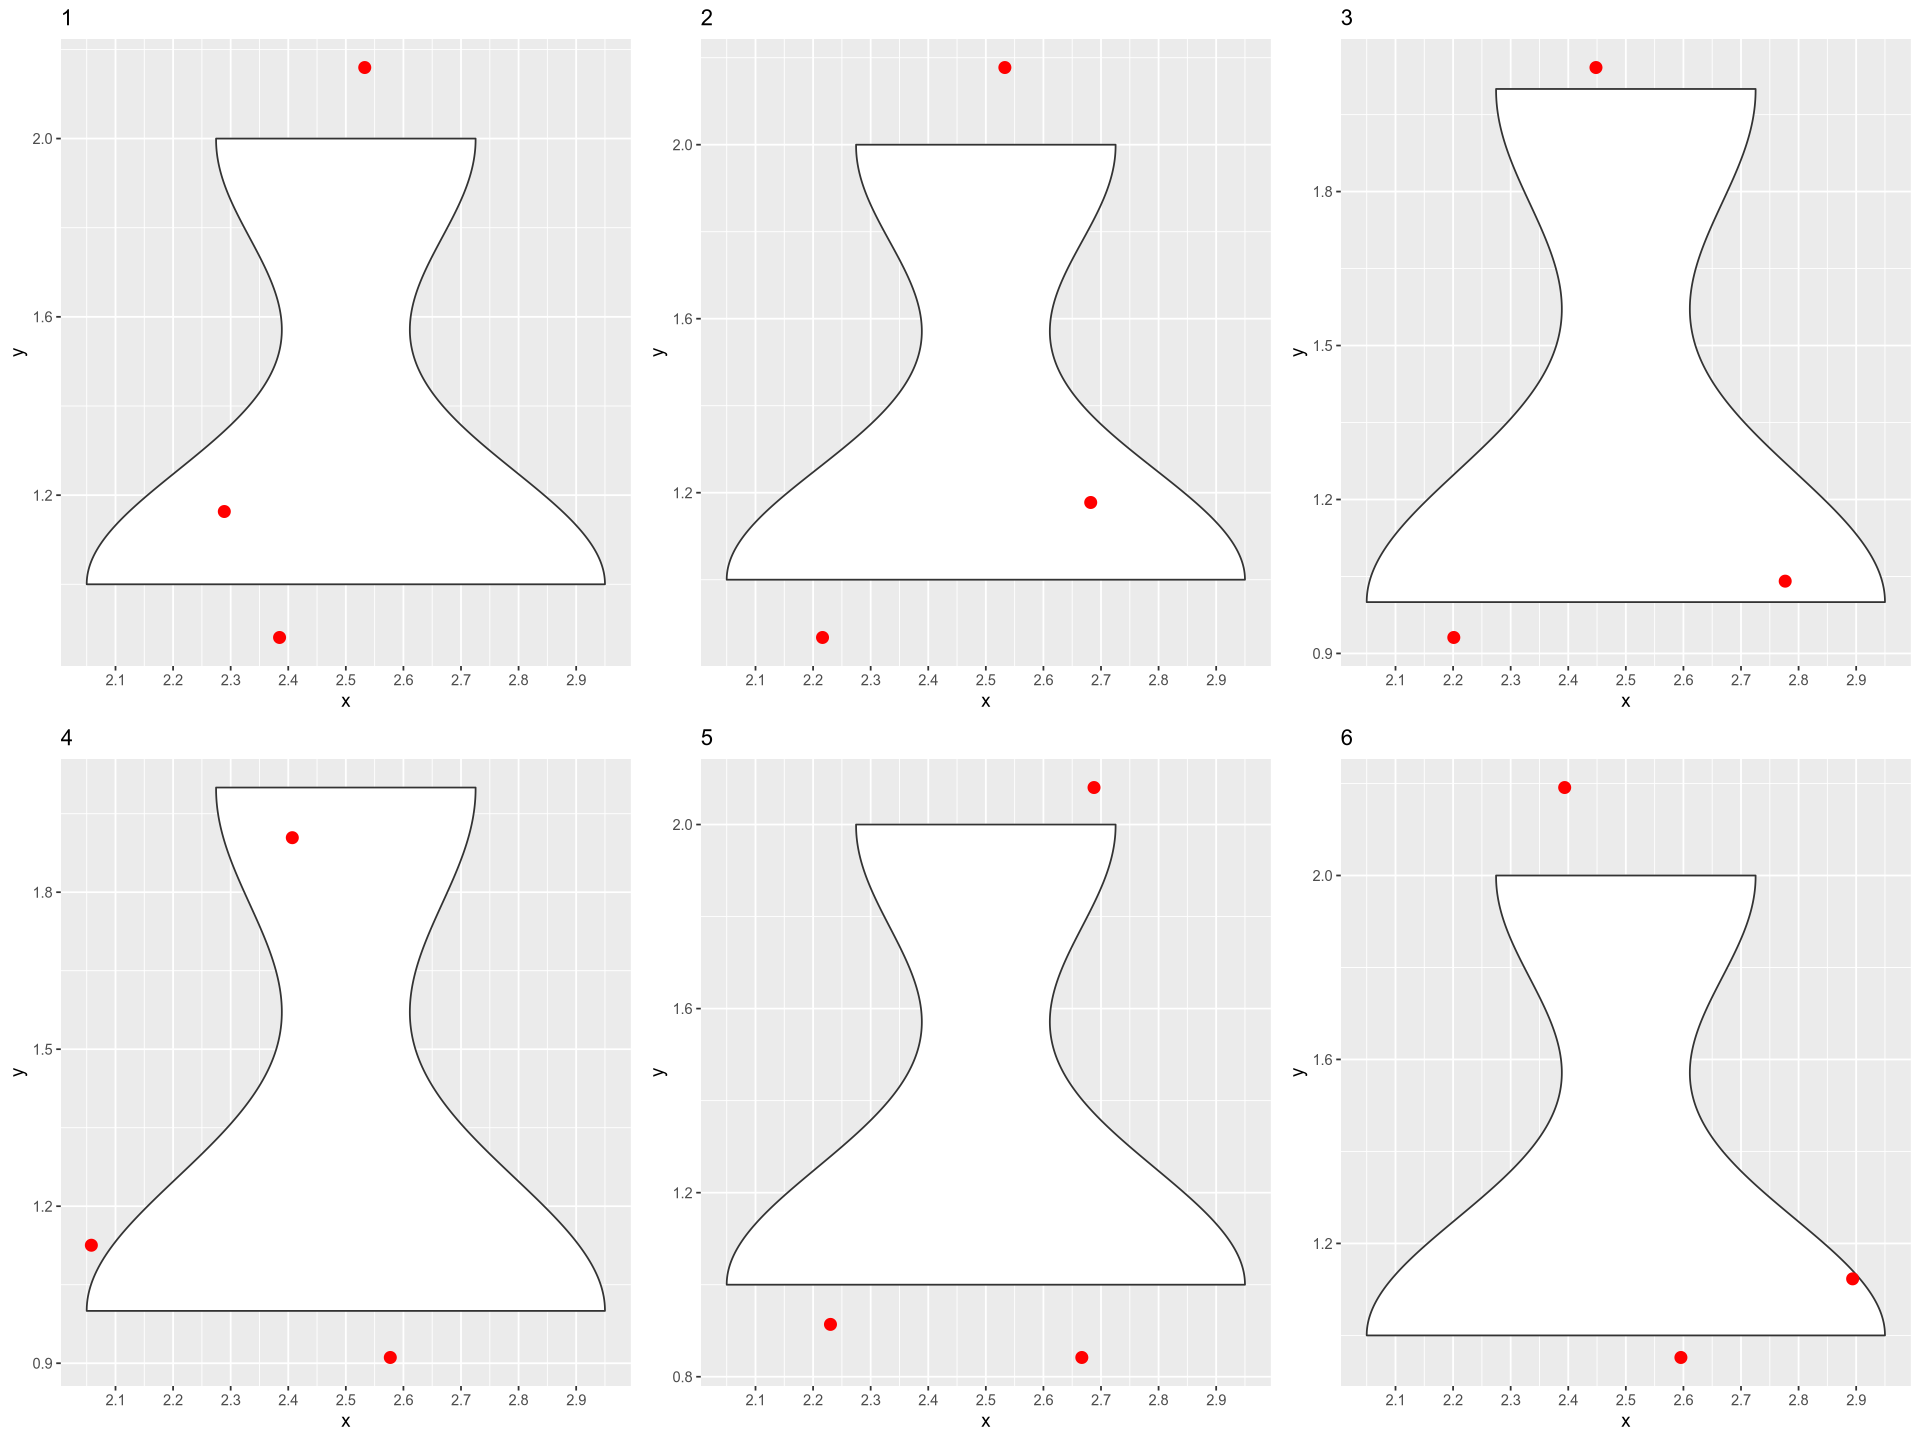

In [12]:
plot_grid(
    get_min_plot(2.5, seed = 1), get_min_plot(2.5, seed = 2), get_min_plot(2.5, seed = 3),
    get_min_plot(2.5, seed = 4), get_min_plot(2.5, seed = 5), get_min_plot(2.5, seed = 6),
    ncol=3
)

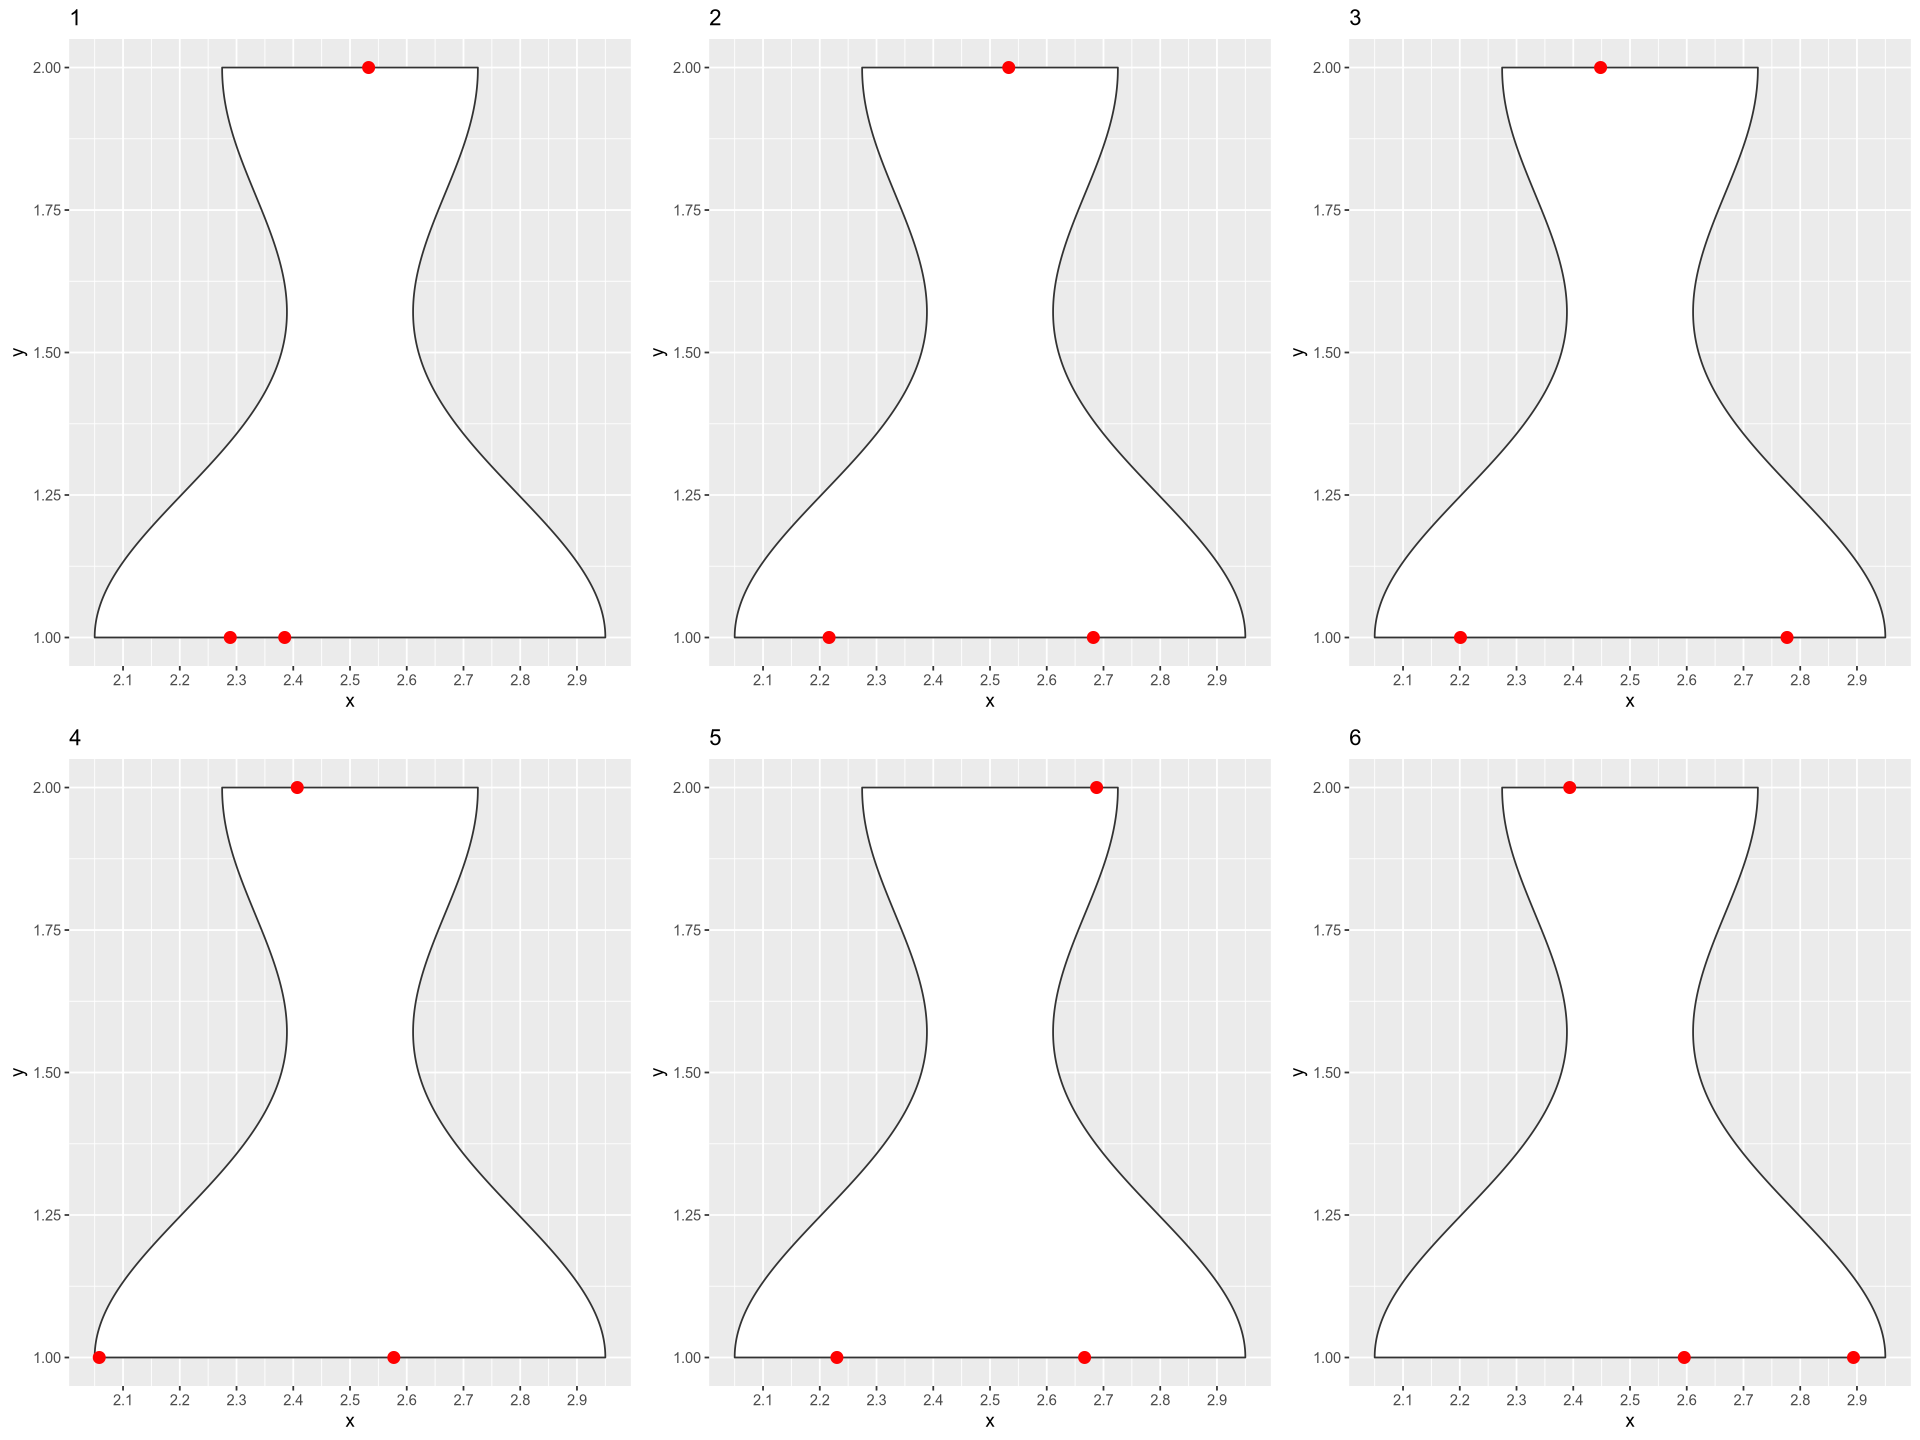

In [13]:
plot_grid(
    get_min_plot(2.5, jitter_y = FALSE, seed = 1), get_min_plot(2.5, jitter_y = FALSE, seed = 2), get_min_plot(2.5, jitter_y = FALSE, seed = 3),
    get_min_plot(2.5, jitter_y = FALSE, seed = 4), get_min_plot(2.5, jitter_y = FALSE, seed = 5), get_min_plot(2.5, jitter_y = FALSE, seed = 6),
    ncol=3
)

In [14]:
options(repr.plot.width = 6, repr.plot.height = 6)

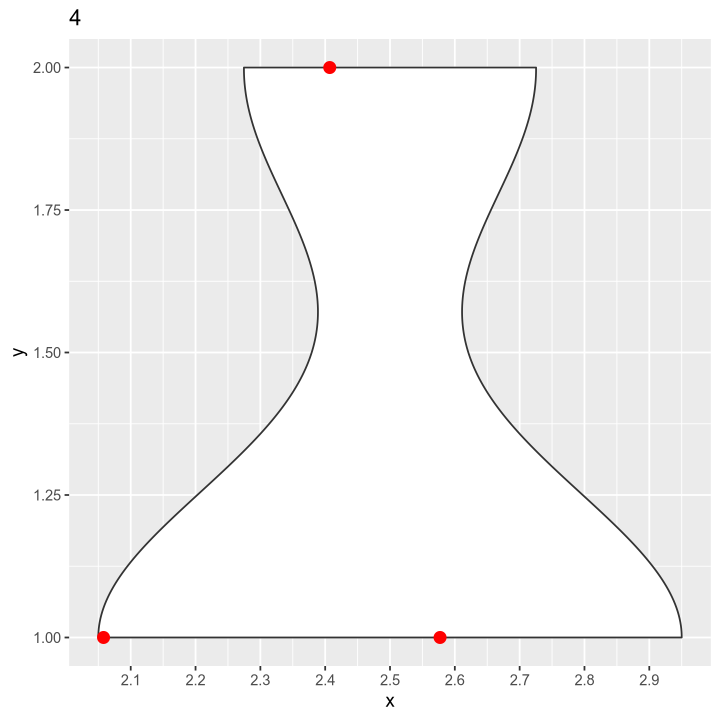

In [15]:
p40 <- get_min_plot(2.5, jitter_y = FALSE, seed = 4)
p40

In [16]:
layer_data(p40, 2)

x,y,PANEL,group,flipped_aes,density,scaled,width,n,sinawidth,xmin,xmax,x_diff,ymax,shape,colour,size,fill,alpha,stroke
<dbl>,<dbl>,<fct>,<int>,<lgl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<lgl>,<lgl>,<dbl>
2.577220,1,1,-1,FALSE,0.9869671,0.9999764,0.9,3,1.0000000,2.05,2.95,0.07722027,1,19,red,3,NA,NA,0.5
2.058051,1,1,-1,FALSE,0.9869671,0.9999764,0.9,3,1.0000000,2.05,2.95,-0.44194878,1,19,red,3,NA,NA,0.5
2.407040,2,1,-1,FALSE,0.4942454,0.5007601,0.9,3,0.5007719,2.05,2.95,-0.09296047,2,19,red,3,NA,NA,0.5


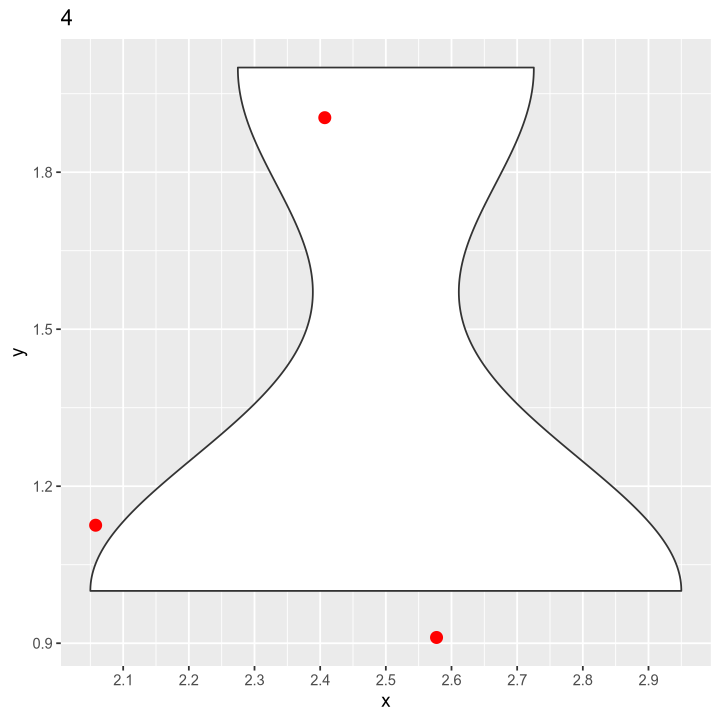

In [17]:
p41 <- get_min_plot(2.5, seed = 4)
p41

In [18]:
layer_data(p41, 2)

x,y,PANEL,group,flipped_aes,density,scaled,width,n,sinawidth,xmin,xmax,x_diff,ymax,shape,colour,size,fill,alpha,stroke
<dbl>,<dbl>,<fct>,<int>,<lgl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<lgl>,<lgl>,<dbl>
2.577220,0.910950,1,-1,FALSE,0.9869671,0.9999764,0.9,3,1.0000000,2.05,2.95,0.07722027,0.910950,19,red,3,NA,NA,0.5
2.058051,1.125430,1,-1,FALSE,0.9869671,0.9999764,0.9,3,1.0000000,2.05,2.95,-0.44194878,1.125430,19,red,3,NA,NA,0.5
2.407040,1.904171,1,-1,FALSE,0.4942454,0.5007601,0.9,3,0.5007719,2.05,2.95,-0.09296047,1.904171,19,red,3,NA,NA,0.5


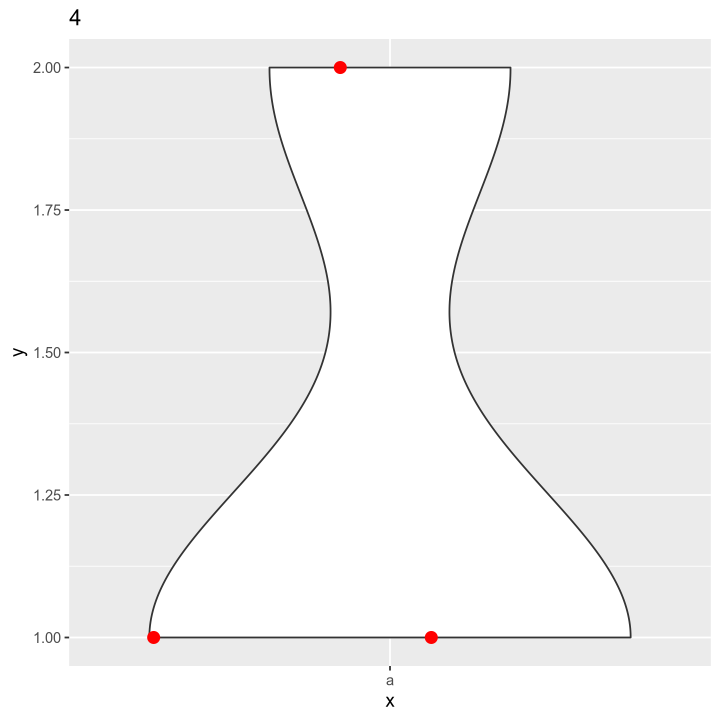

In [19]:
p4c0 <- get_min_plot(jitter_y = FALSE, seed = 4)
p4c0

In [20]:
layer_data(p4c0, 2)

x,y,PANEL,group,flipped_aes,density,scaled,width,n,sinawidth,xmin,xmax,x_diff,ymax,shape,colour,size,fill,alpha,stroke
<mppd_dsc>,<dbl>,<fct>,<int>,<lgl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<mppd_dsc>,<mppd_dsc>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<lgl>,<lgl>,<dbl>
1.0772203,1,1,1,FALSE,0.9869671,0.9999764,0.9,3,1.0000000,0.55,1.45,0.07722027,1,19,red,3,NA,NA,0.5
0.5580512,1,1,1,FALSE,0.9869671,0.9999764,0.9,3,1.0000000,0.55,1.45,-0.44194878,1,19,red,3,NA,NA,0.5
0.9070395,2,1,1,FALSE,0.4942454,0.5007601,0.9,3,0.5007719,0.55,1.45,-0.09296047,2,19,red,3,NA,NA,0.5


### Big data example

In [21]:
options(repr.plot.width = 16, repr.plot.height = 12)

In [22]:
get_norm_plot <- function (n, jitter_y = TRUE) {
    seed = 0
    set.seed(seed)
    ys = rnorm(n)
    xs = rep(2.5, n)
    set.seed(NULL)
    get_plot(data.frame(x = xs, y = ys), jitter_y = jitter_y, seed = seed) + geom_point(color = "green") + ggtitle(n)
}

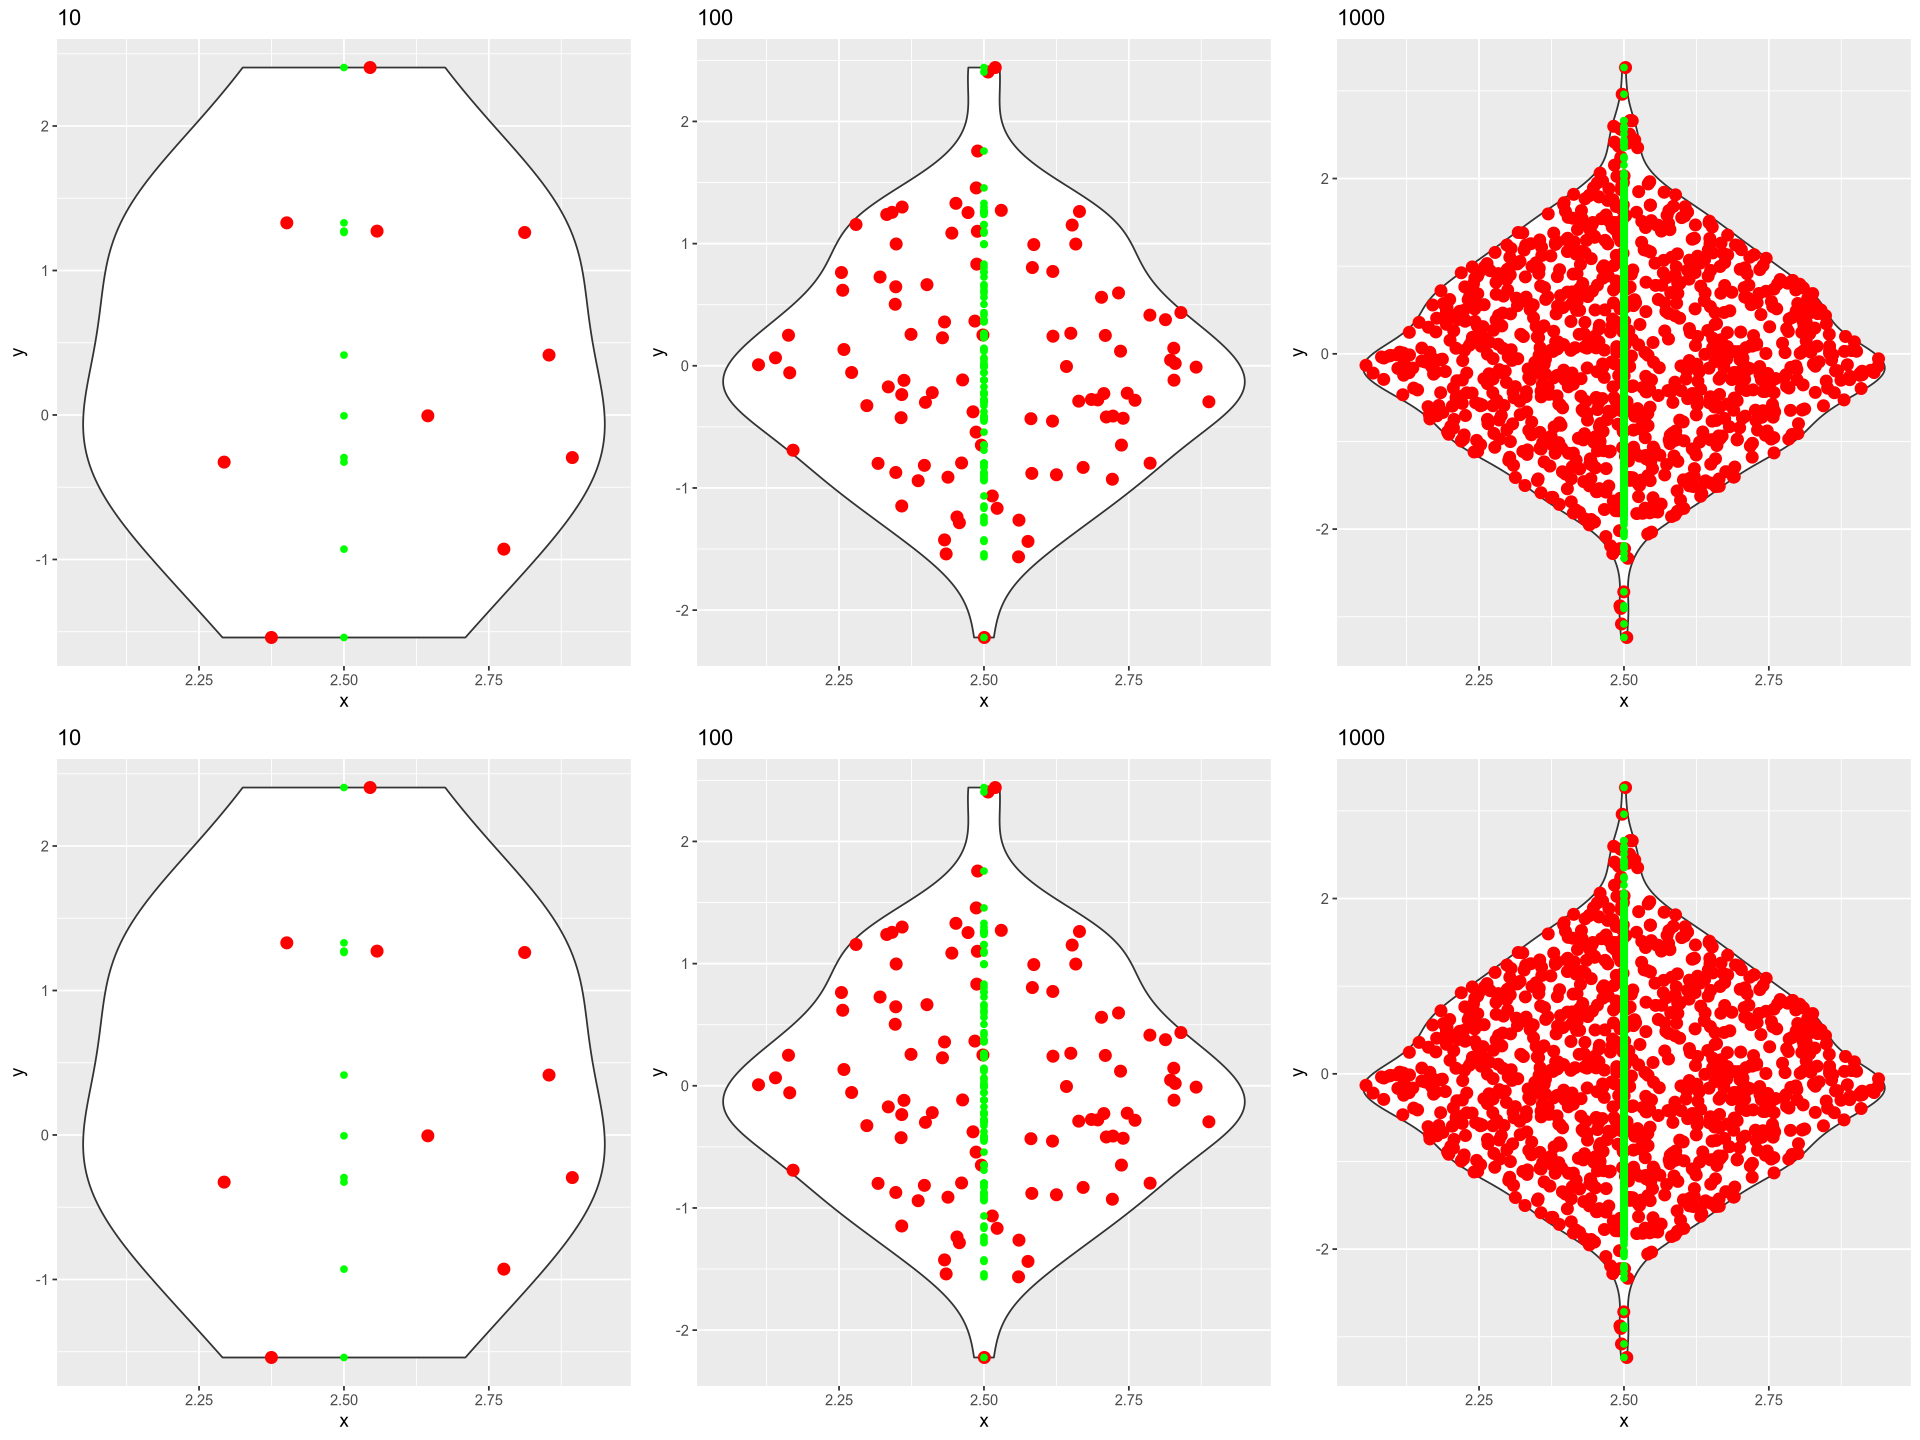

In [23]:
plot_grid(
    get_norm_plot(10),
    get_norm_plot(100),
    get_norm_plot(1000),
    get_norm_plot(10, jitter_y = FALSE),
    get_norm_plot(100, jitter_y = FALSE),
    get_norm_plot(1000, jitter_y = FALSE),
    ncol=3
)

In [24]:
get_pois_data <- function (n, dy = 1, lambda = 1, seed = 0) {
    set.seed(seed)
    xs <- rep(2.5, n)
    ys <- (rpois(n, lambda) + 1) * dy
    set.seed(NULL)
    data.frame(x = xs, y = ys)
}

get_pois_plot <- function (n, dy = 1, lambda = 1, jitter_y = TRUE, seed = 0, position = NULL) {
    if (is.null(position)) {
        get_plot(get_pois_data(n, dy, lambda, seed), jitter_y = jitter_y, seed = seed) + geom_point(color = "green") + ggtitle(dy)
    } else {
        get_plot(get_pois_data(n, dy, lambda, seed), position = position, jitter_y = jitter_y, seed = seed) + geom_point(color = "green") + ggtitle(dy)
    }
}

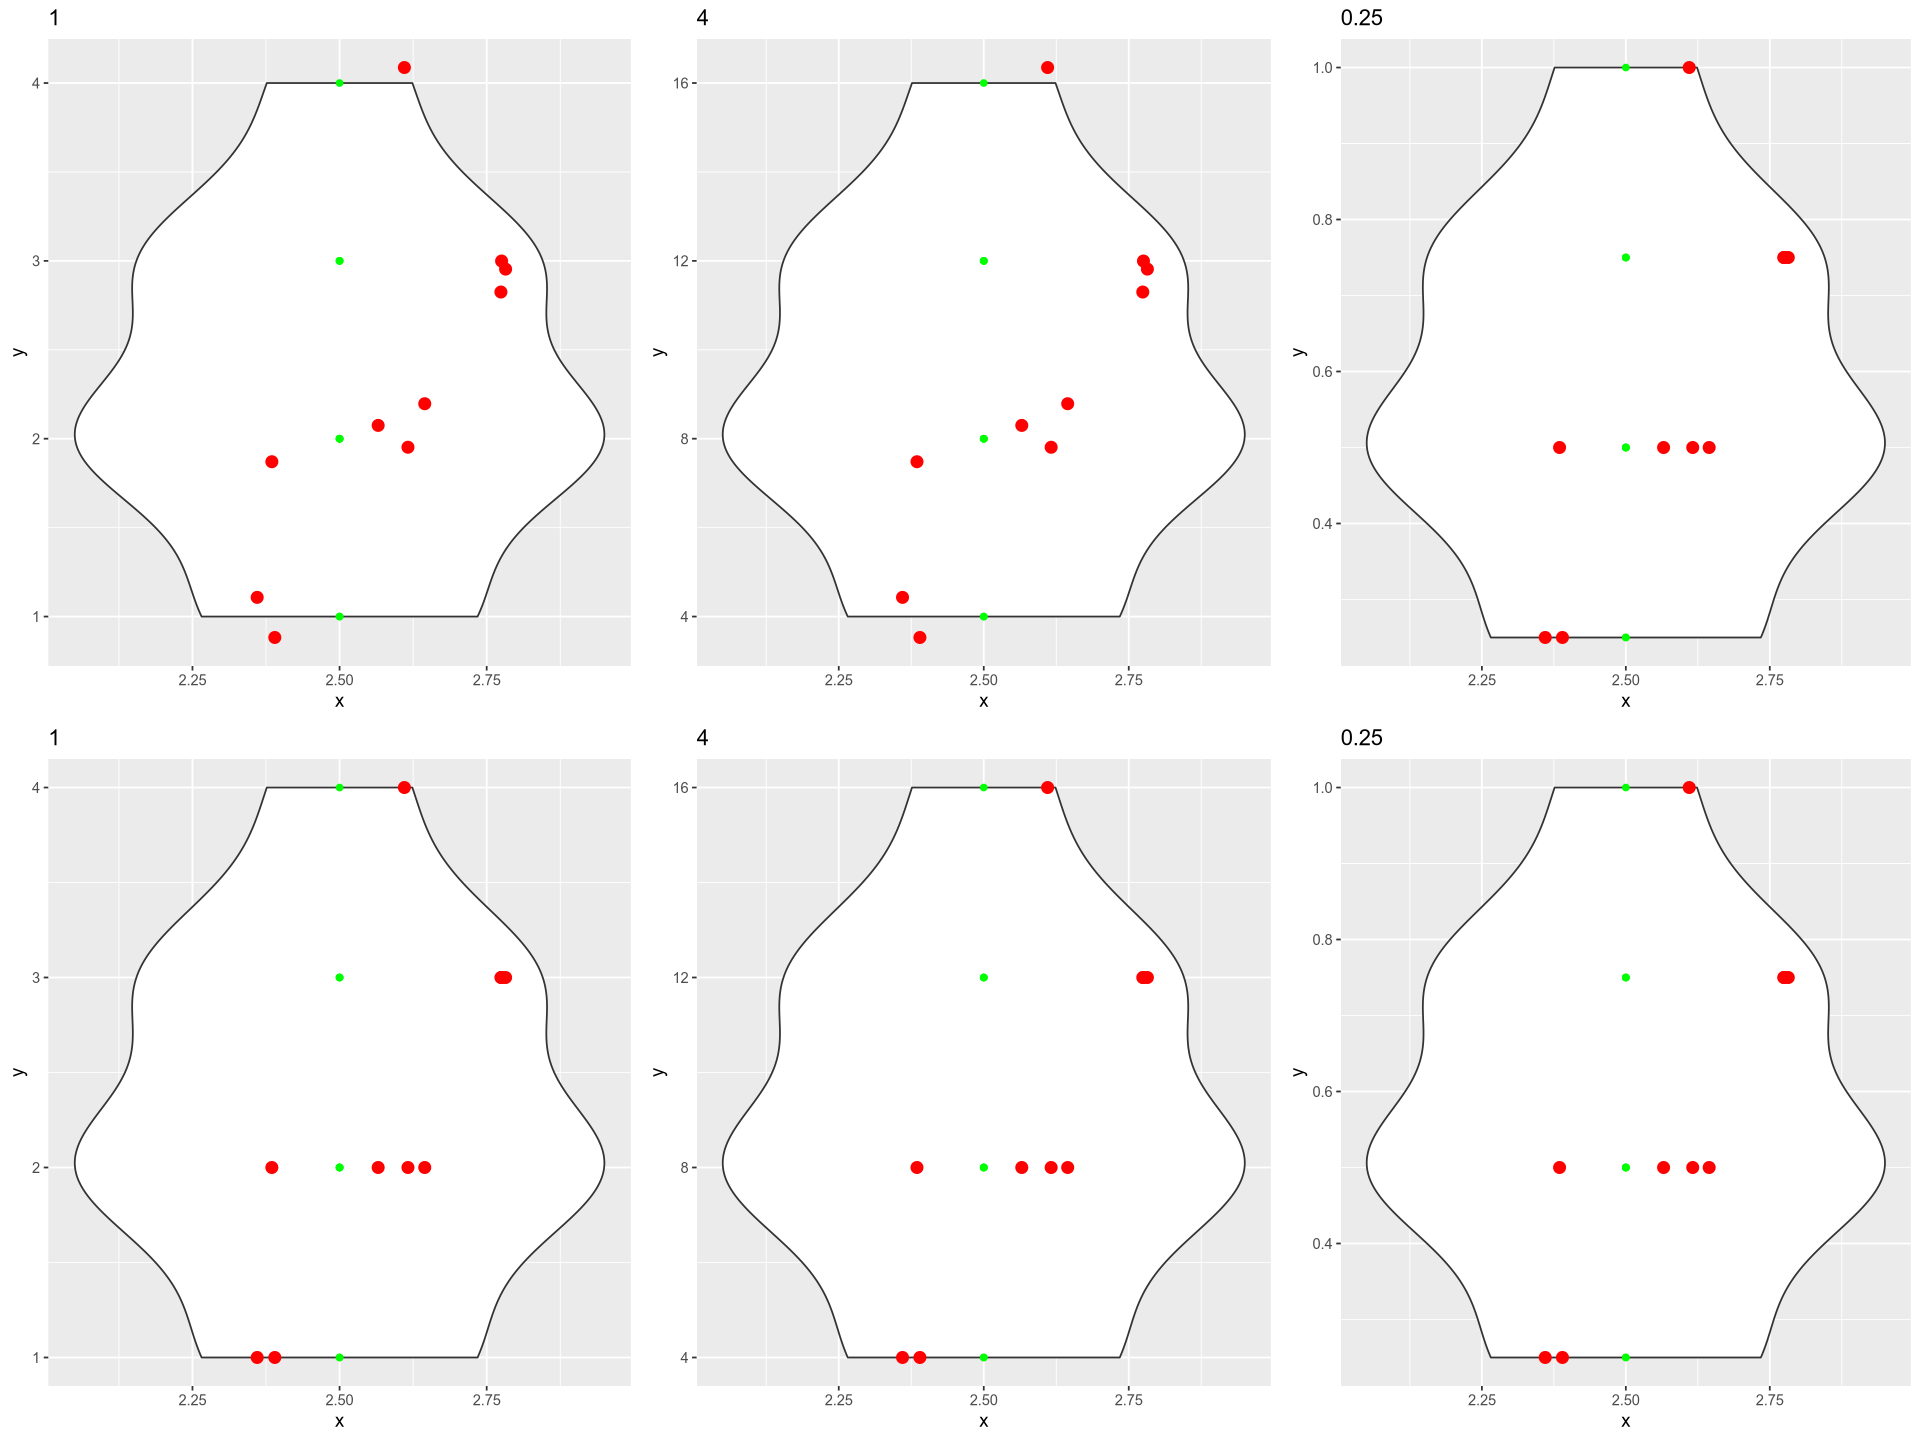

In [25]:
plot_grid(
    get_pois_plot(10),
    get_pois_plot(10, dy = 4),
    get_pois_plot(10, dy = .25),
    get_pois_plot(10, jitter_y = FALSE),
    get_pois_plot(10, dy = 4, jitter_y = FALSE),
    get_pois_plot(10, dy = .25, jitter_y = FALSE),
    ncol=3
)

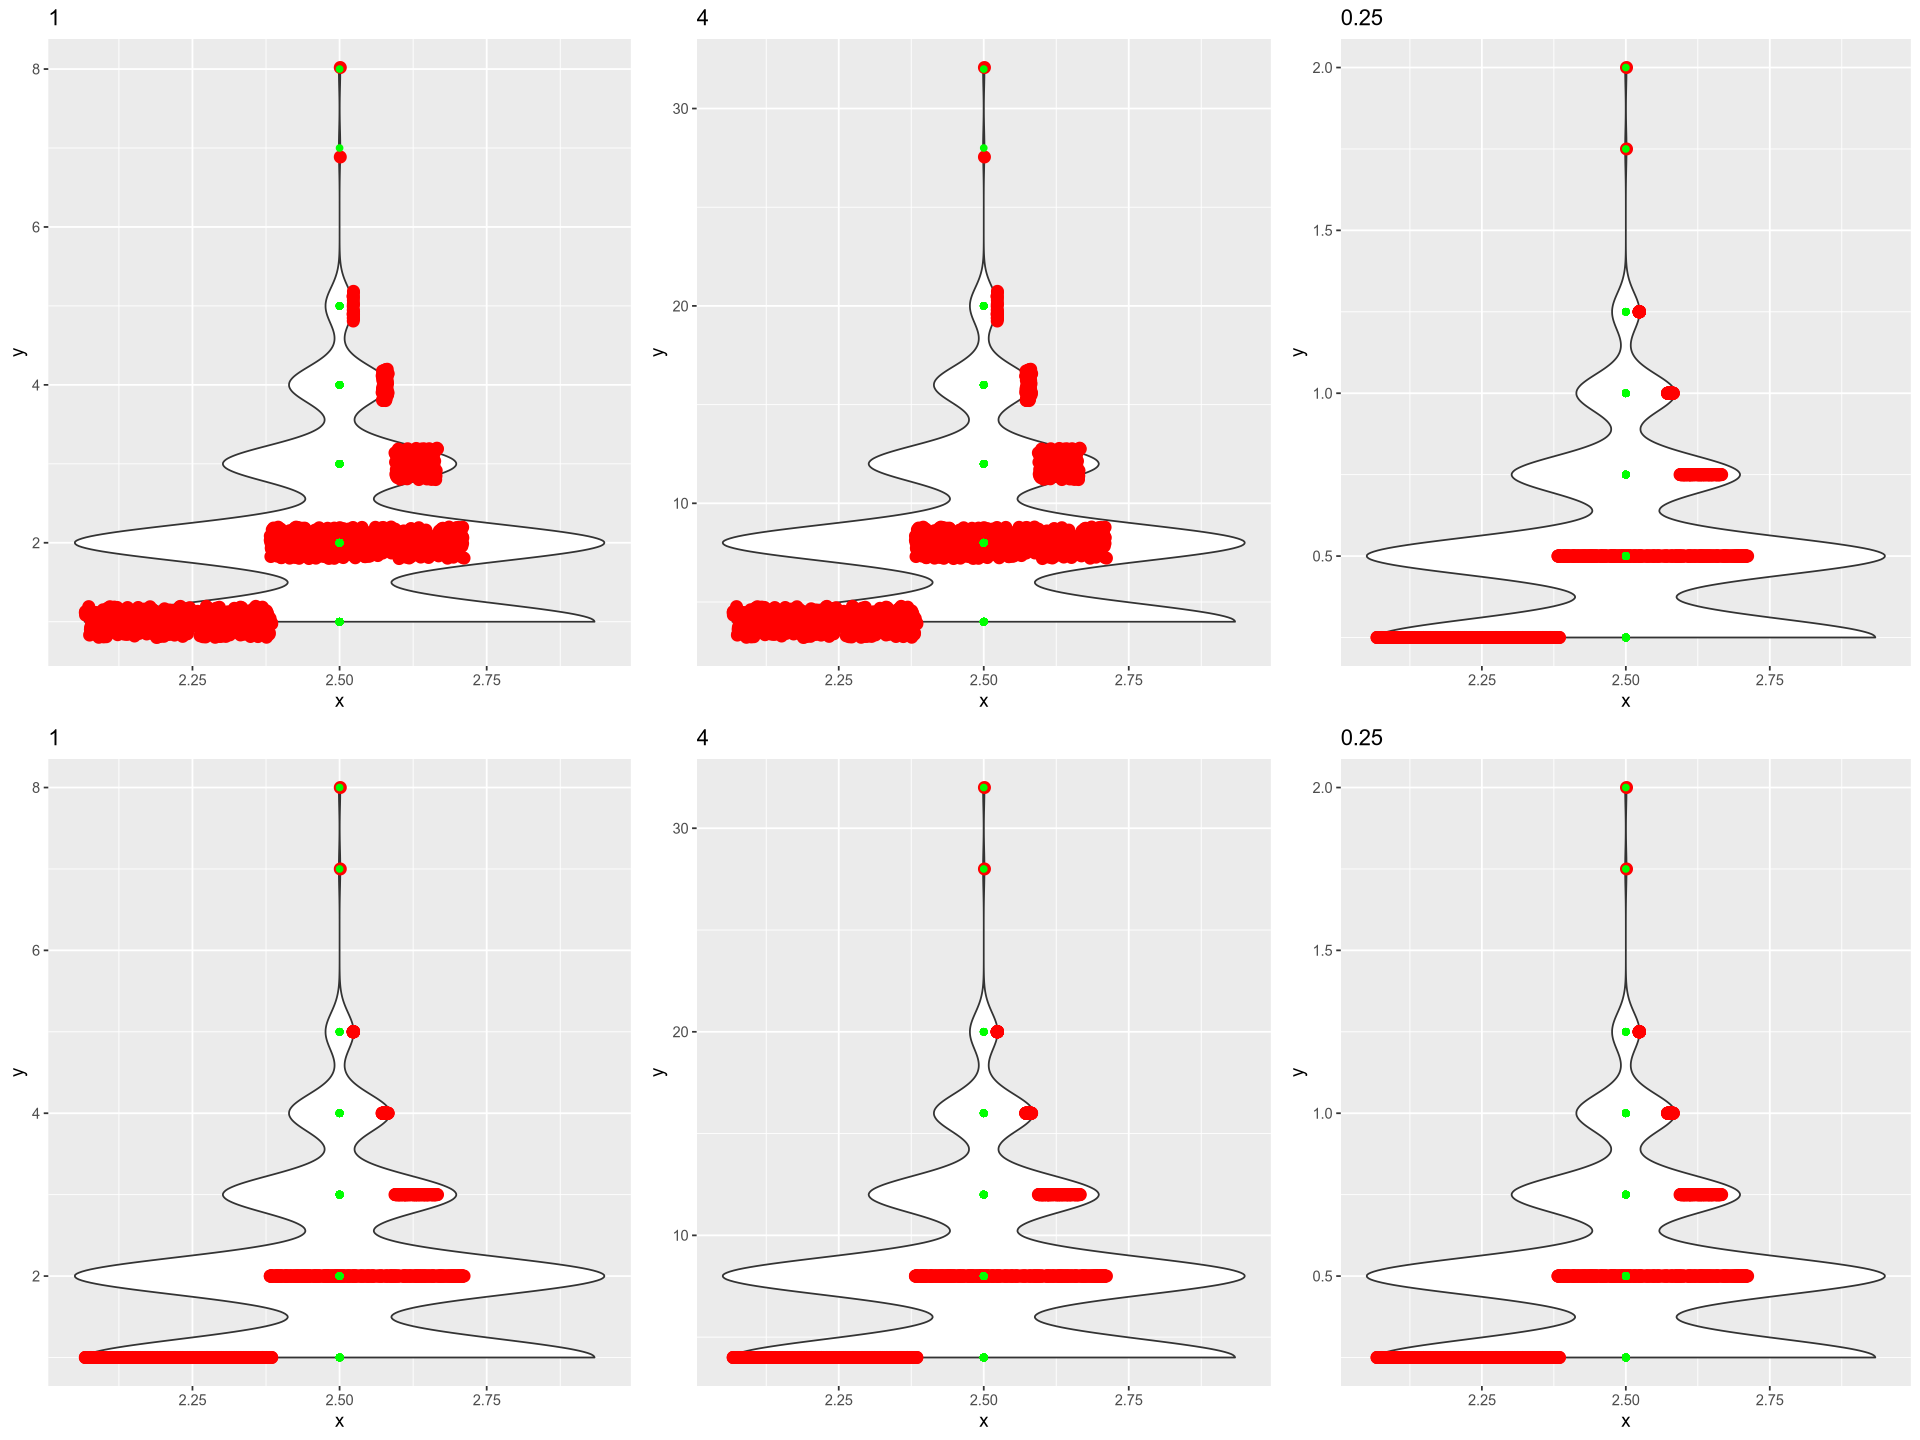

In [26]:
plot_grid(
    get_pois_plot(1000),
    get_pois_plot(1000, dy = 4),
    get_pois_plot(1000, dy = .25),
    get_pois_plot(1000, jitter_y = FALSE),
    get_pois_plot(1000, dy = 4, jitter_y = FALSE),
    get_pois_plot(1000, dy = .25, jitter_y = FALSE),
    ncol=3
)

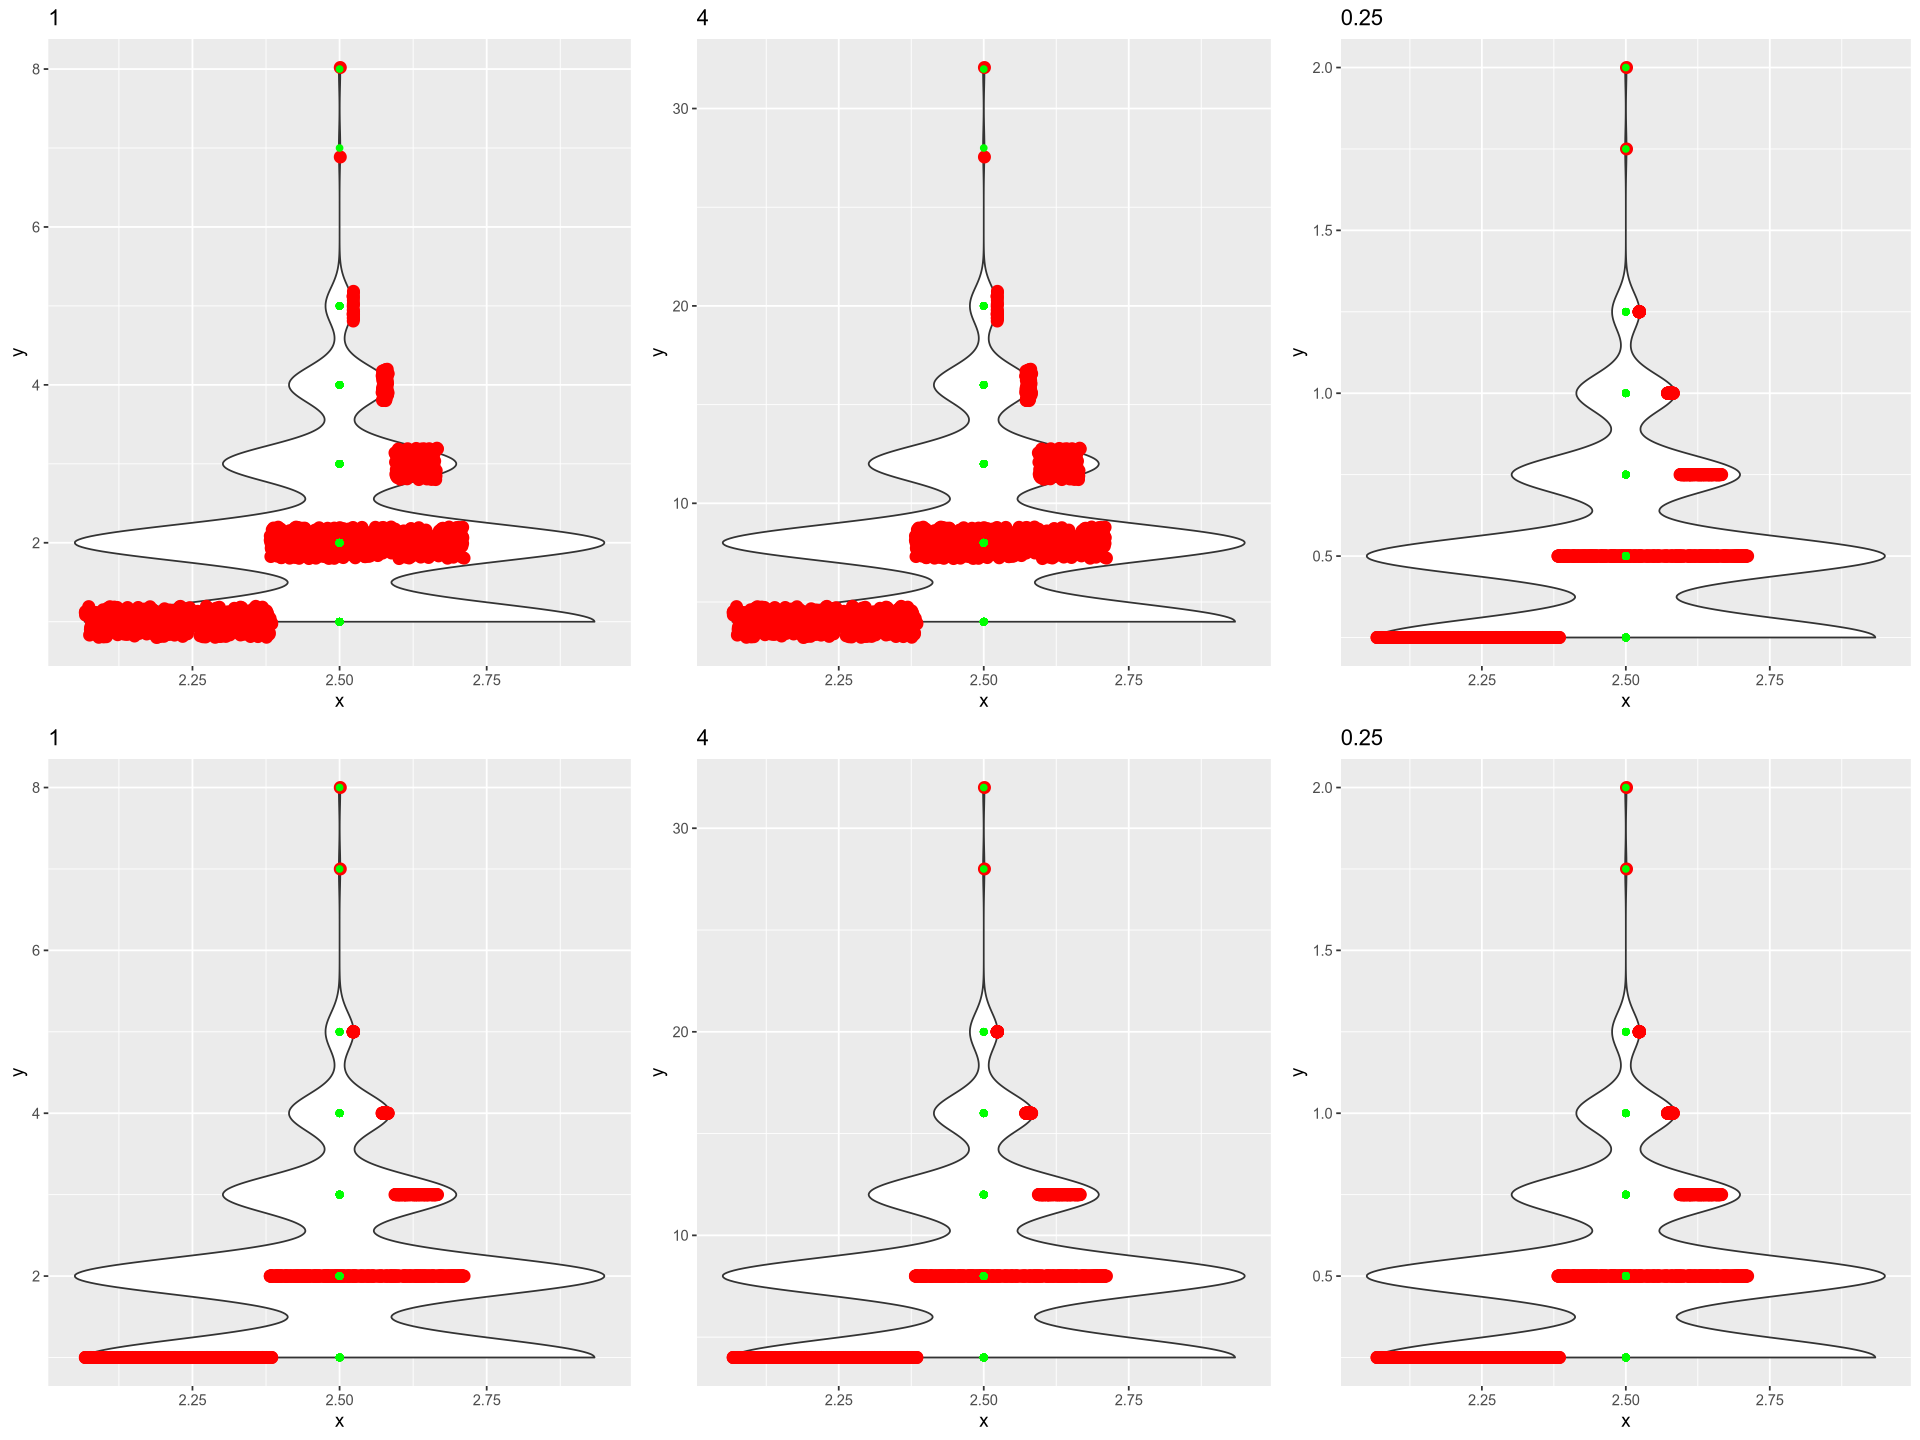

In [27]:
plot_grid(
    get_pois_plot(1000, position = 'identity'),
    get_pois_plot(1000, position = 'identity', dy = 4),
    get_pois_plot(1000, position = 'identity', dy = .25),
    get_pois_plot(1000, position = 'identity', jitter_y = FALSE),
    get_pois_plot(1000, position = 'identity', dy = 4, jitter_y = FALSE),
    get_pois_plot(1000, position = 'identity', dy = .25, jitter_y = FALSE),
    ncol=3
)

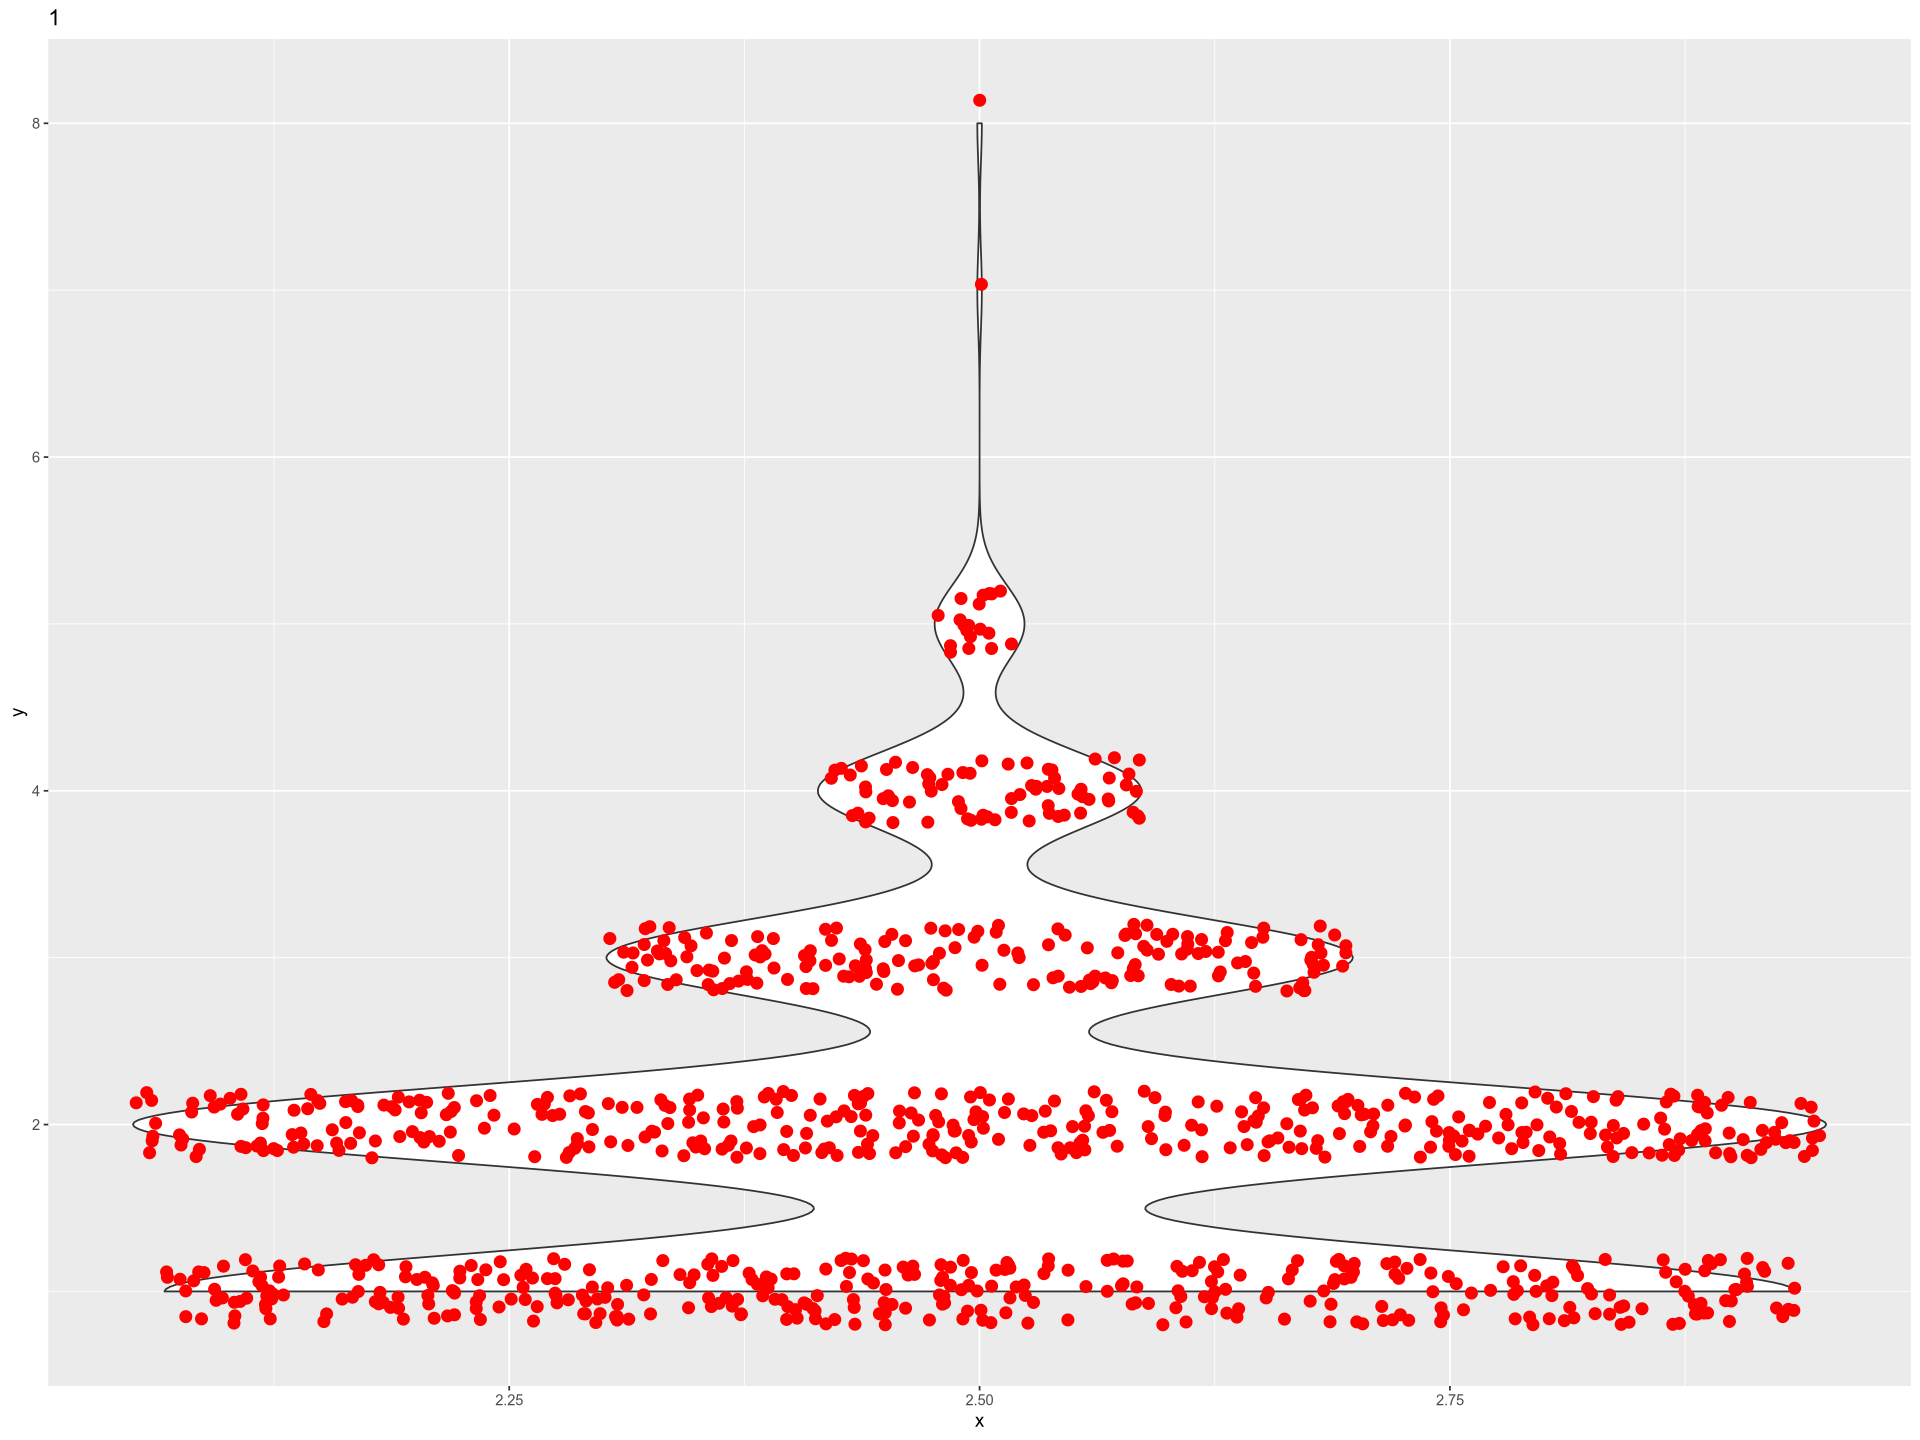

In [28]:
get_plot(get_pois_data(1000), seed = 1)

### Identity stat

In [29]:
options(repr.plot.width = 6, repr.plot.height = 6)

Warning message in geom_sina(aes(x, y), data = data.frame(x = c(2.57722, 2.058051, :
“Ignoring unknown parameters: `orientation`”
Warning message:
“Width not defined
ℹ Set with `position_dodge(width = ...)`”


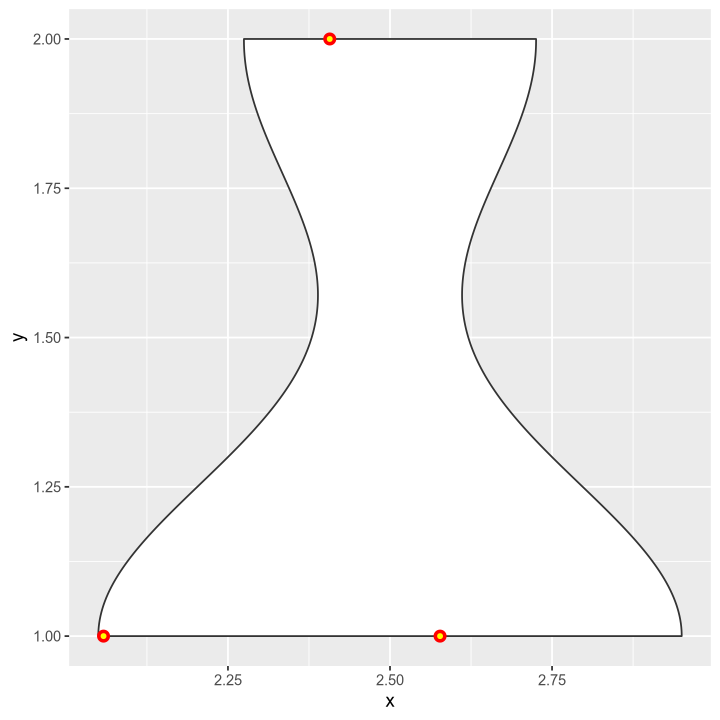

In [30]:
ggplot() +
    geom_violin(aes(x, y), data.frame(
        x = c(2.5, 2.5, 2.5),
        y = c(1, 1, 2)
    )) +
    geom_sina(aes(x, y), data.frame(
        x = c(2.5, 2.5, 2.5),
        y = c(1, 1, 2)
    ), jitter_y = FALSE, seed = 4, color = 'red', size = 3) +
    geom_sina(aes(x, y), data = data.frame(
        x = c(2.577220, 2.058051, 2.407040),
        y = c(1.0, 1.0, 2.0)
    ), stat = 'identity', color = 'yellow', size = 1)